In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

In [2]:
# Reading csv file
data = pd.read_csv('sat.csv', sep='\t', header = (0))

# Setting index
data.set_index('id', inplace = True)

In [3]:
def remove_outliers(data, column, nstd):
    std = data[column].std()
    mean = data[column].mean()
    
    lower_limit = mean - (std * nstd)
    higher_limit = mean + (std * nstd)
    
    lower_mask = data[column] <= lower_limit
    higher_mask = data[column] >= higher_limit
    
    data[column].mask(lower_mask, np.nan, inplace = True)
    data[column].mask(higher_mask, np.nan, inplace = True)

In [4]:
# Removing outliers with a diff over 2 std
remove_outliers(data, 'gpa', 2)
remove_outliers(data, 'sat', 2)

# Dropping all na
data.dropna(inplace = True)

In [5]:
data.describe()

,sat,gpa
count,79.000000,79.000000
mean,1855.012658,3.368608
std,99.468523,0.211961
min,1663.000000,2.830000
25%,1777.500000,3.225000
50%,1850.000000,3.390000
75%,1934.000000,3.510000
max,2050.000000,3.810000


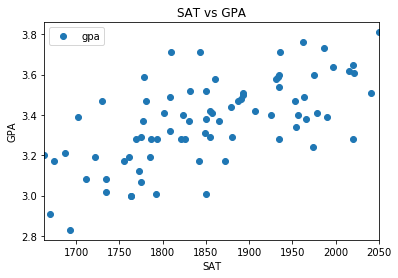

In [6]:
# Plotting clean data
data.plot(x = 'sat', y = 'gpa', style = 'o')  
plt.title('SAT vs GPA')  
plt.xlabel('SAT')  
plt.ylabel('GPA') 
plt.savefig('data.png')

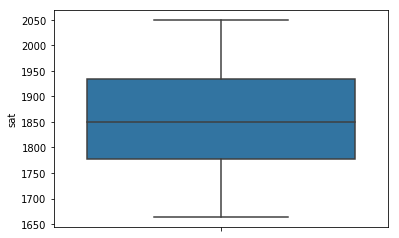

In [7]:
sns.boxplot(y = data.sat)
plt.savefig('sat_boxplot.png')

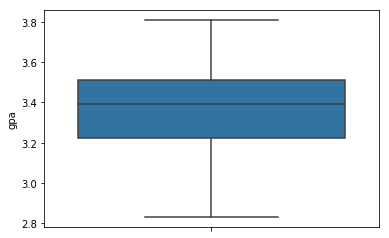

In [8]:
sns.boxplot(y = data.gpa)
plt.savefig('gpa_boxplot.png')

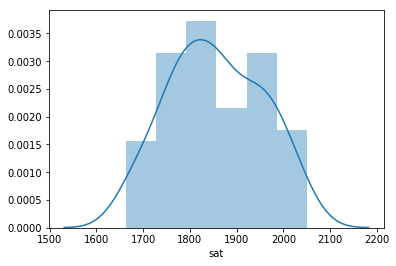

In [9]:
# Plotting sat distribution
plt.figure()
plt.tight_layout()
sns.distplot(data.sat)
plt.savefig('sat_distribution.png')

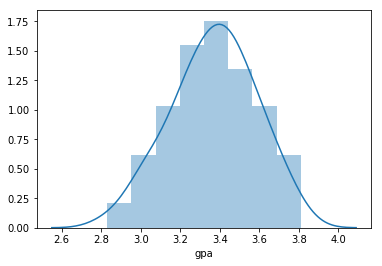

In [10]:
# Plotting gpa distribution
plt.figure()
plt.tight_layout()
sns.distplot(data.gpa)
plt.savefig('gpa_distribution.png')

In [11]:
from sklearn.model_selection import train_test_split

# Extracting values and reshaping for sklearn
sat = data.sat.values.reshape(-1, 1)
gpa = data.gpa.values.reshape(-1, 1)

# Slitting data
sat_train, sat_test, gpa_train, gpa_test = train_test_split(sat, gpa, test_size = 0.3)

In [12]:
from sklearn import linear_model

# Creating and training model
model = linear_model.LinearRegression()
model.fit(sat_train, gpa_train)

# Predicting
gpa_pred = model.predict(sat_test)

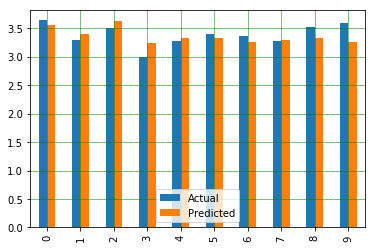

In [13]:
comp = pd.DataFrame({'Actual': gpa_test.flatten(), 'Predicted': gpa_pred.flatten()}).head(10)

# Comparing actual vs prediction
comp.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.gcf().savefig('comparison.png')

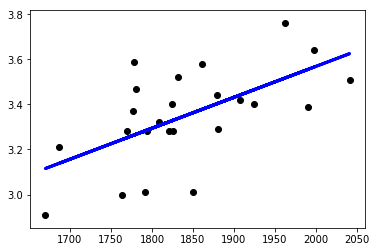

In [14]:
# Regresion model graph
plt.scatter(sat_test, gpa_test,  color='black')
plt.plot(sat_test, gpa_pred, color='blue', linewidth=3)
plt.gcf().savefig('model.png')

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print('Intercept: \n', model.intercept_.flatten())
print('Slope: \n', model.coef_.flatten())

print("Mean absolute error: %.2f" % mean_absolute_error(gpa_test, gpa_pred))
print("Mean squared error: %.2f" % mean_squared_error(gpa_test, gpa_pred))

print('Variance score: %.2f' % r2_score(gpa_test, gpa_pred))

Intercept: 
 [0.81913511]
Slope: 
 [0.00137502]
Mean absolute error: 0.13
Mean squared error: 0.03
Variance score: 0.35
